In [ ]:
2. Data Augmentation

In [17]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=40)
mpl.rc('xtick', labelsize=20)
mpl.rc('ytick', labelsize=20)

# Where to save the figures
PROJECT_ROOT_DIR = "."
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png") 
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import pandas as pd

def plot_img(data):
    data = data.reshape(796,1360)
    plt.imshow(data, cmap = "gray",interpolation="nearest")
    plt.axis("off")
    
import seaborn as sns


In [18]:
#X = np.load('TSNE_DATA_FIN.npy')
data = pd.read_pickle('final_data')

#img1 = b.iloc[6]['images']
#plot_img(img1)
data = data.drop(['images_red_pca','tsne_imgs'],axis=1)
data['images'] = data['images'].apply(np.ravel)

print("Number of rows in data =",data.shape[0])
print("Number of columns in data =",data.shape[1])
print("\n")
print("**Sample data:**")
#data['tsne_imgs'] = data['tsne_imgs'].apply(np.ravel)
#data['images_red_pca'] = data['images_red_pca'].apply(np.ravel)
data.head()



Number of rows in data = 330
Number of columns in data = 5


**Sample data:**


,tissue,abnormality,severity,radius_of_anormality,images
id,,,,,
mdb001,2,3,0,197.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb002,2,3,0,69.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb003,0,5,2,-99999.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb004,0,5,2,-99999.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb005,1,3,0,30.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [19]:
print('b',(data['severity'] ==0).value_counts())
print('m',(data['severity'] ==1).value_counts())
print('n',(data['severity'] ==2).value_counts())

b False    261
True      69
Name: severity, dtype: int64
m False    276
True      54
Name: severity, dtype: int64
n True     207
False    123
Name: severity, dtype: int64


In [20]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((796,1360))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

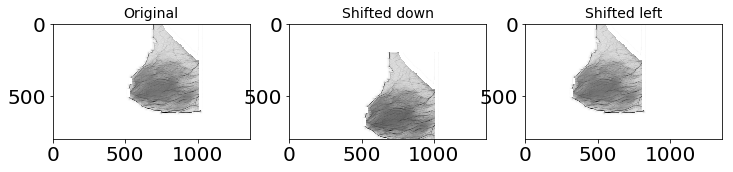

In [21]:
image = data['images'].iloc[0]
shifted_image_down = shift_image(image, 0, 200)
shifted_image_left = shift_image(image, -200, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(796,1360), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(796,1360), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(796,1360), interpolation="nearest", cmap="Greys")
plt.show()

In [22]:
malignant_label = data['severity'] ==1
(data['severity'] ==1).value_counts()

False    276
True      54
Name: severity, dtype: int64

In [23]:
malignant_data = data[malignant_label]
print(malignant_data.shape)
malignant_data.head()

(54, 5)


,tissue,abnormality,severity,radius_of_anormality,images
id,,,,,
mdb023,2,3,1,29.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb028,1,3,1,56.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb058,0,4,1,27.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb072,2,1,1,28.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb075,1,1,1,23.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [24]:
benign_label = data['severity'] == 0
(data['severity'] ==0).value_counts()

False    261
True      69
Name: severity, dtype: int64

In [25]:
benign_data = data[benign_label]
benign_data.head()

,tissue,abnormality,severity,radius_of_anormality,images
id,,,,,
mdb001,2,3,0,197.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb002,2,3,0,69.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb005,1,3,0,30.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb005,1,3,0,26.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
mdb010,1,3,0,33.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
X = malignant_data['images']
severity = malignant_data['severity']
tissue = malignant_data['tissue']
abnormality = malignant_data['abnormality']
radius_of_anormality = malignant_data['radius_of_anormality']

X_augmented = []
y_augmented = []

for dx, dy in ((200, 0), (-200, 0), (0, 200), (0, -200)):
    for image, l1,l2,l3,l4 in zip(X, tissue, abnormality, severity, radius_of_anormality):
        X_augmented.append(shift_image(image, dx, dy))
        y_augmented.append([l1,l2,l3,l4])

X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)        

In [27]:
X_augmented.shape, y_augmented.shape

((216, 1082560), (216, 4))

In [28]:
df2 = pd.DataFrame({"images":[x for x in X_augmented], 'tissue':y_augmented[:,0],
                    'abnormality':y_augmented[:,1], 'severity':y_augmented[:,2], 
                    'radius_of_anormality':y_augmented[:,3]}) 

# for appending df2 at the end of df1 
data = data.append(df2, ignore_index = True,sort=False) 

In [29]:
print('b',(data['severity'] ==0).value_counts())
print('m',(data['severity'] ==1).value_counts())
print('n',(data['severity'] ==2).value_counts())

b False    477
True      69
Name: severity, dtype: int64
m False    276
True     270
Name: severity, dtype: int64
n False    339
True     207
Name: severity, dtype: int64


In [30]:
X = benign_data['images']
severity = benign_data['severity']
tissue = benign_data['tissue']
abnormality = benign_data['abnormality']
radius_of_anormality = benign_data['radius_of_anormality']

X_augmented = []
y_augmented = []

#for dx, dy in ((200, 0), (-200, 0)):
for image, l1,l2,l3,l4 in zip(X, tissue, abnormality, severity, radius_of_anormality):
    X_augmented.append(shift_image(image, -200, 0))
    y_augmented.append([l1,l2,l3,l4])


In [31]:
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented) 

In [32]:
X_augmented.shape

(69, 1082560)

In [33]:
print('b',(data['severity'] ==0).value_counts())
print('m',(data['severity'] ==1).value_counts())
print('n',(data['severity'] ==2).value_counts())

b False    477
True      69
Name: severity, dtype: int64
m False    276
True     270
Name: severity, dtype: int64
n False    339
True     207
Name: severity, dtype: int64


In [34]:
df2 = pd.DataFrame({"images":[x for x in X_augmented], 'tissue':y_augmented[:,0],
                    'abnormality':y_augmented[:,1], 'severity':y_augmented[:,2], 
                    'radius_of_anormality':y_augmented[:,3]}) 

# for appending df2 at the end of df1 
data = data.append(df2, ignore_index = True,sort=False) 

In [ ]:
data.shape

In [35]:
print('b',(data['severity'] ==0).value_counts())
print('m',(data['severity'] ==1).value_counts())
print('n',(data['severity'] ==2).value_counts())

b False    477
True     138
Name: severity, dtype: int64
m False    345
True     270
Name: severity, dtype: int64
n False    408
True     207
Name: severity, dtype: int64


In [ ]:
#ss = data.iloc[0:483,:]
#ss = ss.append(data.iloc[684:,:],ignore_index = True,sort=False)


In [36]:
data.to_pickle('MAMMOGRAMS_augmented_2')